# Pymaceuticals Inc.
---

### Analysis

- At least for the Capomulin regimen, there is a strong correlation between tumor size and mouse weight
- Mice who received the Capomulin and Ramicane drug regimen saw overall significantly decreased tumor volumes compared to other treatments

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_data = pd.merge(mouse_metadata,study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousestudy_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_num = mousestudy_data['Mouse ID'].nunique()
mice_num

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mousestudy_data[mousestudy_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]['Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = mousestudy_data[mousestudy_data.duplicated(subset=['Mouse ID','Timepoint'])]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mousestudy_data[~mousestudy_data['Mouse ID'].isin(dup_mouse)]


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_mouse_data['Mouse ID'].nunique()
clean_mice_num

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
fulldf = clean_mouse_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
m_mean = fulldf["Tumor Volume (mm3)"].mean()
m_median = fulldf["Tumor Volume (mm3)"].median()
m_var = fulldf["Tumor Volume (mm3)"].var()
m_std = fulldf["Tumor Volume (mm3)"].std()
m_sem = fulldf["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_summary = pd.DataFrame({"Mean Tumor Volume": m_mean,"Median Tumor Volume": m_median,"Tumor Volume Variance": m_var,
                            "Tumor Volume Std. Dev.": m_std,"Tumor Volume SEM": m_sem})
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
mouse_summary = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
mouse_summary.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

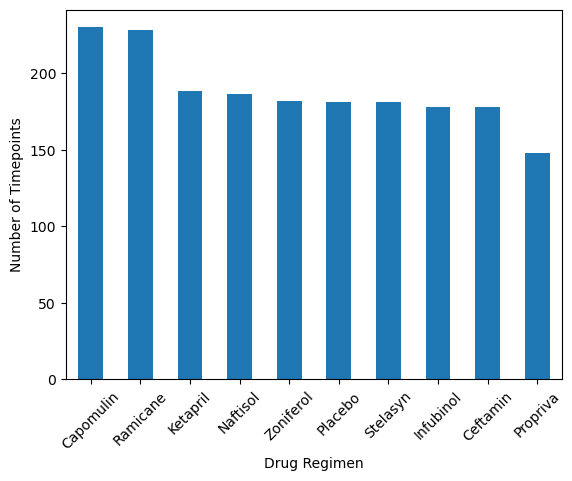

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = clean_mouse_data["Drug Regimen"].value_counts()
timepoint_count.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "Number of Timepoints")
plt.xticks(rotation = 45)
plt.show()

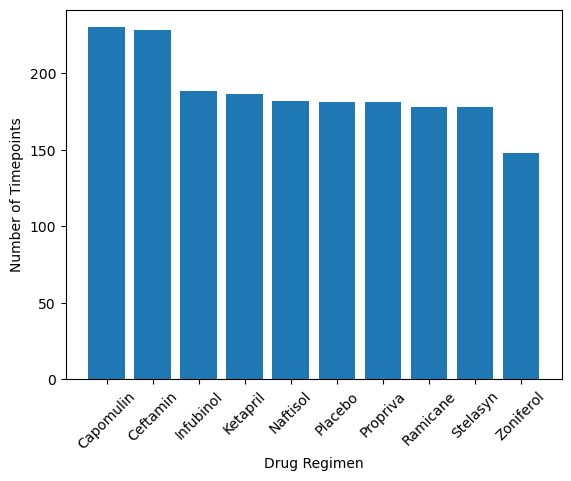

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mouse_summary.index,timepoint_count)
plt.xticks(rotation = 45)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.show()


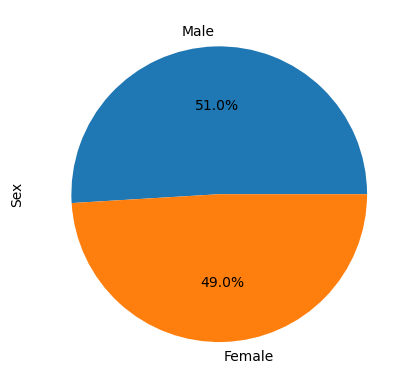

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mouse_data["Sex"].value_counts()
sex_counts.plot(kind = "pie", autopct = "%1.1f%%")

plt.show()

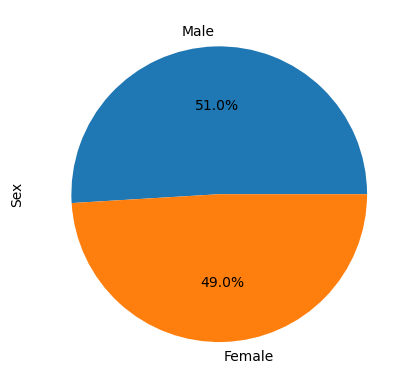

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=["Male","Female"],autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtumorvol = clean_mouse_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_maxdf = pd.merge(maxtumorvol,clean_mouse_data, on=["Mouse ID", "Timepoint"])
merged_maxdf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvol = merged_maxdf.loc[merged_maxdf["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumorvoldata.append(tumorvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumorvol.loc[(tumorvol < lower_bound) | (tumorvol > upper_bound)]
    
    print(f"{treatment}'s outliers: {list(outliers)}")

Capomulin's outliers: []
Ramicane's outliers: []
Infubinol's outliers: [36.3213458]
Ceftamin's outliers: []


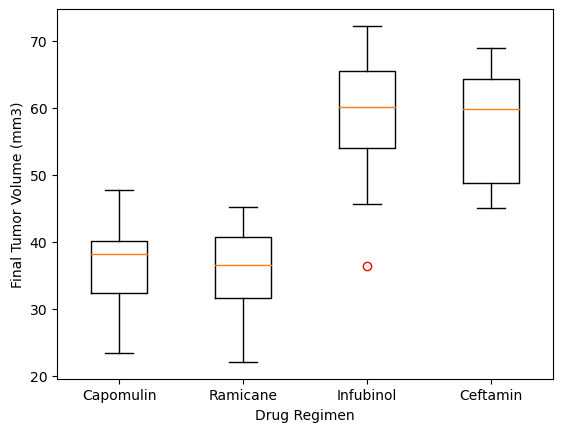

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorvoldata, labels = treatments, flierprops = {"markeredgecolor": "red"})
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

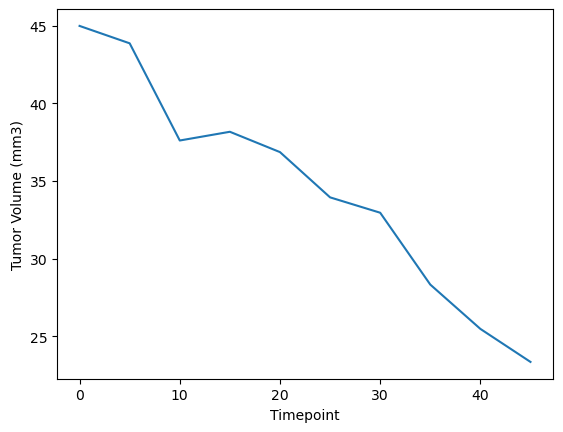

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

In [18]:
# Generate a line plotcof tumor volume vs. time point for a mouse treated with Capomulin
cap_data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
cap_mouse = cap_data.loc[cap_data["Mouse ID"] == cap_data["Mouse ID"].unique()[0]]

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

print(cap_mouse)

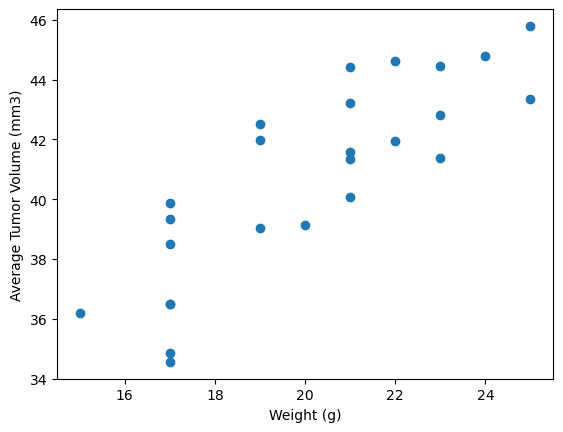

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_weight_avg = cap_data.groupby("Mouse ID").mean()["Weight (g)"]
cap_tumor_avg = cap_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
plt.scatter(cap_weight_avg, cap_tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

correlation coefficient: 0.84


C:\Users\maryi\AppData\Local\Temp\ipykernel_17552\956266156.py:6: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  regression_model = stats.linregress(cap_weight_avg, cap_tumor_avg)


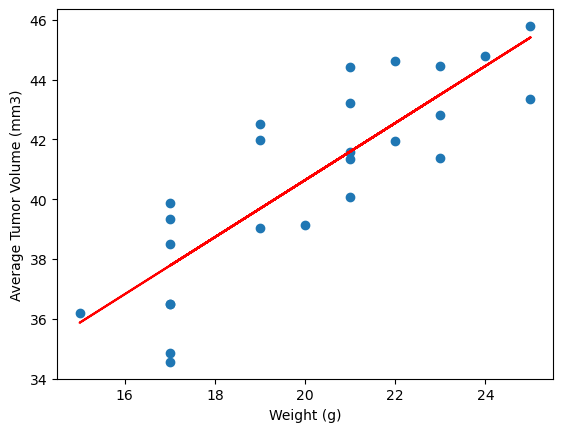

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = pearsonr(cap_weight_avg, cap_tumor_avg)[0]
print(f"correlation coefficient: {corr:.2f}")

regression_model = stats.linregress(cap_weight_avg, cap_tumor_avg)

plt.scatter(cap_weight_avg, cap_tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(cap_weight_avg, regression_model.intercept + regression_model.slope * cap_weight_avg, color='red')

plt.show()